# Performing Customer Analytics

In this lesson, we will be programmatically performing customer analytics on the transactional dataset that we've cleaned in the previous lesson.

Our goal with this lesson is to learn how to implement the knowledge we've gained till now in order to find answers to meaningful customer-related questions.

Let us start by importing the necessary libraries,

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Next, importing the CSV file called `customer_dataset.csv` which contains information about the purchases made by the customers.

In [2]:
# Read the CSV data as a Pandas DataFrame
customer_df = pd.read_csv('data/customer_dataset.csv')

In [3]:
# Looking at the first five rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


Let us also view the shape of the DataFrame to determine how many rows of data are in the cleaned dataset.

In [4]:
# Printing the shape of the DataFrame
customer_df.shape

(406828, 5)

We can start our analysis by determining how many unique data values are present in each column of the DataFrame. We will be using the `nunique()` method off of the Pandas DataFrame for this.

In [5]:
# Printing the number of unique data values present in each column
customer_df.nunique()

CustomerID      4372
InvoiceNo      22189
AmountSpent     3027
InvoiceDate    20460
Country           37
dtype: int64

The dataset holds information about 4372 unique customers from 37 different countries.

Also, we can clearly see that even though there are 400,000+ recorded transactions, there are only 22,189 unique invoice numbers. Therefore, we can conclude that the invoice number is not unique to each transaction.

Now, let us find the total number of unique customers per country. We can use the `groupby()` method off of the Pandas DataFrame for this.

In [6]:
# Getting the total number of unique customers per country
customer_df.groupby(['Country'])[['CustomerID']].nunique()

,CustomerID
Country,
Australia,9
Austria,11
Bahrain,2
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1


Let us assign this DataFrame to a variable, rename the column and sort it based on the number of unique customers per country.

In [7]:
# Getting the total number of unique customers per country
df_country = customer_df.groupby(['Country'])[['CustomerID']].nunique()

# Renaming the column names
df_country.columns = ['no_of_customers']

# Sorting the DataFrame based on the number of customers
df_country = df_country.sort_values('no_of_customers', ascending=False)

# Looking at the first five rows
df_country.head()

,no_of_customers
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25


Now that we have our sorted DataFrame, let us visualize it using a bar plot.

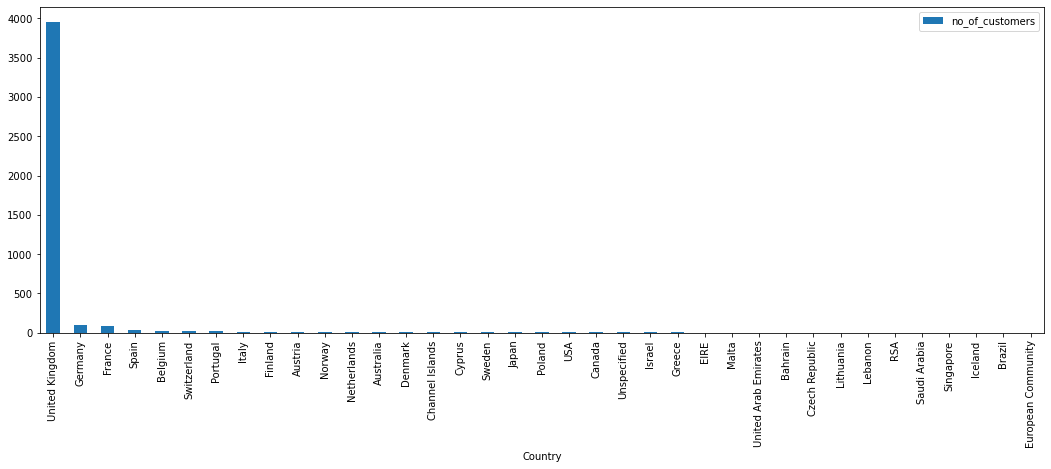

In [8]:
# Plotting a bar plot
df_country.plot(kind='bar', figsize = (18,6))

We can clearly see how the customers are distributed per country using the bar plot.

As a next step, let us generate insights using the four methods of analytics we have learnt before:

- Using **Descriptive Analytics**, we can describe the plot stating that most of the customers of the online retail store are from the United Kingdom. Also, we can also conclude that most of the customers of the online retail store are based in Europe in comparison to other continents.

- Using **Diagnostic Analytics**, we can diagnose that the cause for the large number of customers coming in from Europe is because the online retail store must have heavily marketed itself in Europe rather than the other continents.

- Using **Predictive Analytics**, we can predict that the online retail store will continue getting more customers from the United Kingdom since there is already a massive number of customer base in the United Kingdom.

- Using **Prescriptive Analytics**, we can prescribe the online retail store to further invest in marketing in the United Kingdom since number of conversions are very good over there.

Now, let us move on to understand how the customers are generating revenue for the online retail store.

For this, we will be calculating the total amount of transaction per month. So, let us extract the year and month information from the `InvoiceDate` column.

In [9]:
# Looking at the first five rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [10]:
# Getting only the year and month from the date column
pd.to_datetime(customer_df['InvoiceDate']).apply(lambda x:x.strftime("%Y-%m"))

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
406823    2011-12
406824    2011-12
406825    2011-12
406826    2011-12
406827    2011-12
Name: InvoiceDate, Length: 406828, dtype: object

In [11]:
# Assigning the extracted values to a new column 
customer_df['InvoiceYearMonth'] = pd.to_datetime(customer_df['InvoiceDate']).apply(lambda x:x.strftime("%Y-%m"))

In [12]:
# Looking at the first five rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country,InvoiceYearMonth
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom,2010-12
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom,2010-12
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12


We can now calculate the total revenue amount for each month per year by using the `groupby()` method as before and finding the sum of the column instead of the unique number of data elements.

In [13]:
# Getting the total revenue per month per year
df_revenue = customer_df.groupby(['InvoiceYearMonth'])[['AmountSpent']].sum()

# Looking at the first five rows
df_revenue.head()

,AmountSpent
InvoiceYearMonth,
2010-12,590823.760
2011-01,663815.700
2011-02,457728.550
2011-03,611036.910
2011-04,512352.871


Next, let us plot the values to see the trend of amount spent by the customers for each month.

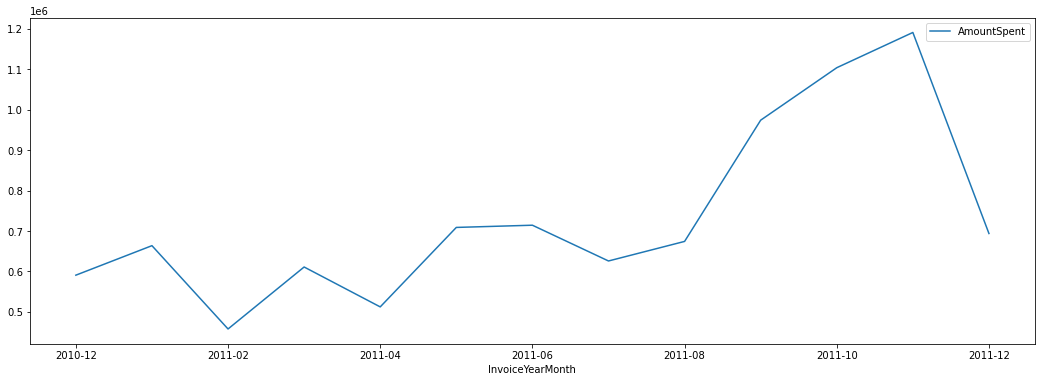

In [14]:
# Plotting a line plot
df_revenue.plot(kind='line', figsize = (18,6))

We can see straightaway that the sale has dropped significantly in the December of 2011. Is the online retail store losing customers?

Let us find out the reason for this.

We can find the date and time at which the last data point was collected in this DataFrame by finding the maximum value of the `InvoiceDate` column.

In [15]:
# Finding the maximum value of the DateTime column
customer_df['InvoiceDate'].max()

'2011-12-09 12:50:00'

So, the early stopping of the data collection was the cause for the downward fall of sales in December.

Let us now shift our focus a little bit more towards the customers and find how many monthly active customers were present in each month.

In [16]:
# Creating monthly active customers DataFrame by counting unique Customer IDs
df_monthly_active = customer_df.groupby('InvoiceYearMonth')[['CustomerID']].nunique()

# Renaming the column name
df_monthly_active.columns = ['no_of_unique_customers']

# Looking at the first five rows
df_monthly_active.head()

,no_of_unique_customers
InvoiceYearMonth,
2010-12,948
2011-01,783
2011-02,798
2011-03,1020
2011-04,899


Now, plotting the data using a bar plot.

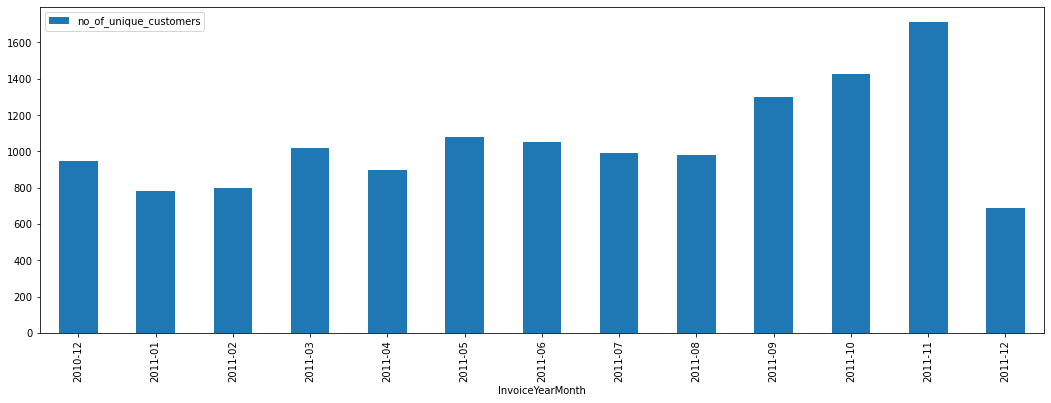

In [17]:
# Plotting a bar plot
df_monthly_active.plot(kind='bar', figsize = (18,6))

We can see that the growth of active customers per month follows a similar trend as the growth in total revenue per month. So, we can suggest that the growth of active customers may be the cause behind the growth in total revenue generated per month. That is an interesting insight indeed.

With this, we've come to the end of this lesson. Hopefully, you've now seen the true power of  descriptive, diagnostic, predictive and prescriptive analytics in analytics.

As an exercise, I would like to encourage you to generate insights on your own for the above active user per month plot using the four different method of analytics as we've already done before.